In [2]:
import os
import time

from dotenv import load_dotenv
import pandas as pd
# LangChain imports
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import RetrievalQA, LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.document_loaders import TextLoader
from langchain_google_genai import ChatGoogleGenerativeAI

import utils

In [13]:
caminho_arquivo = '_chat.txt'
file = []
with open(caminho_arquivo, encoding='utf-8') as f:
    for linha in f:
        file.append(linha)

In [14]:
messages = [utils.parse_message(msg) for msg in file if utils.parse_message(msg) is not None]
df = pd.DataFrame(messages)
df.head()

,date,time,author,content,is_question
0,02/10/19,11:17:12,Câmara de Graduação,‎Messages and calls are end-to-end encrypted. ...,False
1,02/10/19,11:17:12,Patricia Guimarães Costa,‎Patricia Guimarães Costa created this group,False
2,24/02/22,14:18:21,Câmara de Graduação,‎Vera Martin (Prograd) added you,False
3,24/02/22,14:19:38,Vera Martin (Prograd),"Michele, muito obrigada por tudo. Sucesso e qu...",False
4,24/02/22,14:20:16,Michele,Obrigada!!!!,False


In [15]:
df = utils.cortar_por_token(df)
df.head()

,date,time,author,content,is_question
10408,01/01/23,11:19:09,Cláudia,Feliz 2023!!!!! Que tenhamos um novo recomeço ...,False
10409,01/01/23,17:21:59,~ Rosevaldo,https://gabinetedatransicao.com.br/noticias/di...,False
10410,01/01/23,17:22:54,Ady,Essa imagem diz muito 👆🏻,False
10411,01/01/23,17:23:08,Ady,❤️,False
10412,01/01/23,17:27:43,Adriana Queiroz - Agronomia,Eu nunca vi uma posse tão representativa,False


# TCC

In [5]:
# Load environment variables from .env (for local development)
load_dotenv()

# Try to get API key from Streamlit secrets, then fallback to environment variable
gemini_api_key = os.getenv("GEMINI_KEY")
os.environ["GOOGLE_API_KEY"] = gemini_api_key


In [6]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.7)


In [7]:
prompt = PromptTemplate(
    input_variables=["contexto", "pergunta"],
    template="Contexto:\n{contexto}\n\nPergunta:\n{pergunta}\n\nResposta:"
)

In [8]:
chain = LLMChain(llm=llm, prompt=prompt)


C:\Users\larae\AppData\Local\Temp\ipykernel_7884\1929250370.py:1: LangChainDeprecationWarning:

The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.



## Texto Completo Sem Ruídos básicos

### Resumo Curto

In [9]:
df['mensagem_formatada'] = df['date'] + ' ' + df['time'] + ' ' + df['author'] + ": " + df['content']

# 2. Juntar todas as mensagens em um único texto
texto = '\n'.join(df['mensagem_formatada'])

# 3. Salvar em um arquivo .txt
with open('conversa_whatsapp.txt', 'w', encoding='utf-8') as arquivo:
    arquivo.write(texto)

print("Arquivo gerado com sucesso!")

Arquivo gerado com sucesso!


In [10]:
texto[:100]

'01/01/23 11:19:09 Cláudia: Feliz 2023!!!!! Que tenhamos um novo recomeço com saúde, luz em nossas vi'

In [11]:
pergunta= "Com base no contexto fornecido, gere um resumo curto"

In [12]:
df_resumo = pd.DataFrame(columns=['pergunta', 'resposta', 'texto', 'tempo'])

In [13]:
start = time.time()
#resposta = chain.run(contexto=texto[:size], pergunta=pergunta)
resposta = chain.run(contexto=texto, pergunta=pergunta)
end = time.time()

C:\Users\larae\AppData\Local\Temp\ipykernel_7884\690738643.py:3: LangChainDeprecationWarning:

The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.



In [14]:
print("Resposta:", resposta)
print(f"Tempo: {end - start:.2f} segundos")
print(len(resposta))

Resposta: Este é um trecho de um longo chat de grupo entre coordenadores e outros membros da comunidade acadêmica da UEFS, com discussões sobre diversos tópicos relacionados ao ensino, administração, políticas da universidade e bem-estar dos estudantes e professores. Os participantes trocam informações, fazem perguntas, compartilham notícias, expressam preocupações sobre problemas do sistema, solicitam documentos, organizam eventos, apoiam uns aos outros em questões pessoais e profissionais, e discutem estratégias para melhorar o ambiente acadêmico. Há também mensagens sobre a situação política e econômica do país, o impacto da pandemia e a importância da valorização da educação pública.
Tempo: 42.27 segundos
686


In [15]:
df_resumo = pd.DataFrame(columns=['pergunta', 'resposta', 'texto', 'tempo'])

In [16]:

new_row = pd.DataFrame({
    'pergunta': [pergunta],
    'resposta': [resposta],
    'texto': [1],
    'tempo': [end - start]
})

# Concatena com o DataFrame existente
df_resumo = pd.concat([df_resumo, new_row], ignore_index=True)

## Resumo Médio

In [17]:
pergunta= "Com base no contexto fornecido, elabore um resumo"

In [18]:
time.sleep(60)
start = time.time()
resposta = chain.run(contexto=texto, pergunta=pergunta)
end = time.time()

In [19]:
print("Resposta:", resposta)
print(f"Tempo: {end - start:.2f} segundos")
print(len(resposta))

Resposta: Este é um trecho de um fórum online, provavelmente um grupo de WhatsApp ou similar, onde coordenadores e professores da Universidade Estadual de Feira de Santana (UEFS) trocam mensagens sobre diversos assuntos relacionados à vida acadêmica, processos burocráticos e desafios enfrentados na instituição.

Os tópicos abordados incluem:

*   **Boas festas e felicitações:** Mensagens de feliz ano novo, parabéns por aniversários e conquistas.
*   **Questões da PROGRAD:** Dúvidas sobre procedimentos, prazos, documentos necessários para matrículas, transferências, aproveitamento de disciplinas, validação de vacinas, etc., com a participação ativa de Vera Martin (Prograd).
*   **Problemas com o Sagres:** Dificuldades de acesso, erros no sistema, lançamento de notas, atualização de dados, e a necessidade de melhorias no sistema.
*   **Discussões sobre a curricularização da extensão:** Dúvidas sobre o processo, UCEs, componentes EXT, implementação nos cursos noturnos, e a necessidade de 

In [20]:
new_row = pd.DataFrame({
    'pergunta': [pergunta],
    'resposta': [resposta],
    'texto': [2],
    'tempo': [end - start]
})

# Concatena com o DataFrame existente
df_resumo = pd.concat([df_resumo, new_row], ignore_index=True)

### Resumo Longo

In [21]:
pergunta = "Com base no contexto fornecido, gere um resumo longo"


In [22]:
time.sleep(60)
start = time.time()
resposta = chain.run(contexto=texto, pergunta=pergunta)
end = time.time()
print("Resposta:", resposta)
print(f"Tempo: {end - start:.2f} segundos")
print(len(resposta))

Resposta: Com base no contexto fornecido, o grupo de coordenadores de cursos da UEFS (Universidade Estadual de Feira de Santana) está em constante comunicação e colaboração, compartilhando informações, dúvidas, angústias e soluções sobre diversos aspectos da gestão acadêmica, o funcionamento da universidade e o bem-estar da comunidade acadêmica.

Temas Recorrentes:

*   **Questões Acadêmicas e Administrativas:** Grande parte das mensagens gira em torno de desafios práticos e burocráticos enfrentados pelos coordenadores, como:
    *   Processos de matrícula (principalmente relacionados a alunos ingressantes por SISU, transferências e portadores de diploma).
    *   Comprovação vacinal e homologação no sistema SISVAC.
    *   Digitação e alocação de horários, incluindo problemas com o sistema SAGRES.
    *   Aproveitamento de estudos, principalmente em relação a disciplinas cursadas em EAD ou em outras instituições.
    *   Regulamentação de estágios obrigatórios e não obrigatórios.
    

In [23]:
new_row = pd.DataFrame({
    'pergunta': [pergunta],
    'resposta': [resposta],
    'texto': [3],
    'tempo': [end - start]
})

# Concatena com o DataFrame existente
df_resumo = pd.concat([df_resumo, new_row], ignore_index=True)

In [24]:
df_resumo.to_csv('resumos.csv', encoding='utf-8', sep=';', index=False)

In [3]:
df_resumo = pd.read_csv('resumos.csv', encoding='utf-8', sep=';')
df_resumo

,pergunta,resposta,texto,tempo
0,"Com base no contexto fornecido, gere um resumo...",Este é um trecho de um longo chat de grupo ent...,1,42.272351
1,"Com base no contexto fornecido, elabore um resumo","Este é um trecho de um fórum online, provavelm...",2,40.856580
2,"Com base no contexto fornecido, gere um resumo...","Com base no contexto fornecido, o grupo de coo...",3,43.602582


In [58]:
for i in df_resumo[df_resumo['texto']==3]['resposta']:
    print(len(i))

4219


# Responder a Perguntas

In [26]:
perguntas = [
    "Quais falhas do Sagres foram discutidas do texto?",
    "Quais resoluções foram discutidas no Texto?",
    "Listar dicas de uso do Sagres",
    "Quais as palavras mais mencionadas por Rosa?",
    "Quantas Resoluções CONSEPE foram citadas?",
    "Quais professores mais participaram das conversas, listando o número de contribuições?"
]

In [27]:
df_questions = pd.DataFrame(columns=['pergunta', 'resposta', 'texto', 'tempo'])


## Texto Completo

In [28]:

time.sleep(60)
for p in perguntas:
    start = time.time()
    resposta = chain.run(contexto=texto, pergunta=p)
    end = time.time()
    print(f"Pergunta: {p}")
    print("Resposta:", resposta)
    print(f"Tempo: {end - start:.2f} segundos")
    print("-" * 50)  # Separador para melhor visualização

    # Adiciona os resultados ao DataFrame
    q = pd.DataFrame({
        'pergunta': [p],
        'resposta': [resposta],
        'texto': [1],
        'tempo': [end - start]
    })

    df_questions = pd.concat([df_questions, q], ignore_index=True)

    time.sleep(60)

Pergunta: Quais falhas do Sagres foram discutidas do texto?
Resposta: As falhas do Sagres discutidas no texto são:

* **Erro de cálculo no escore presente no Sagres** (reportado por vários alunos, afetando a matrícula).
* **Problemas no lançamento do Sagres nos dias 09 e 10** (data de início na caderneta consta como 13/02/2023 para docentes que acessaram a caderneta 23.1 entre novembro e dezembro de 2022).
* **Problemas com o sistema de vacinação**, como a falta de visualização do status da homologação pelos alunos e a dificuldade de anexar documentos.
* **Dificuldade de anexar documento por erro no Servidor** (relatado por Pedro Prates).
* **Sistema não ter como registrar falta (caso de estágio)**.
* **Fechamento do sistema** (que impede ajustes).
* **Relatórios que não podem mais ser gerados** (como o quadro de horários).
* **Dificuldade de identificar as disciplinas de maior índice de reprovação**.
* **Falta de acesso ao código do curso para recuperação de senha**.
* **Mudanças de c

In [29]:
df_questions.to_pickle('respostas_perguntas.pkl')

## Texto com Resumos

In [30]:
resumos = df_resumo['resposta'].tolist()
resumos

['Este é um trecho de um longo chat de grupo entre coordenadores e outros membros da comunidade acadêmica da UEFS, com discussões sobre diversos tópicos relacionados ao ensino, administração, políticas da universidade e bem-estar dos estudantes e professores. Os participantes trocam informações, fazem perguntas, compartilham notícias, expressam preocupações sobre problemas do sistema, solicitam documentos, organizam eventos, apoiam uns aos outros em questões pessoais e profissionais, e discutem estratégias para melhorar o ambiente acadêmico. Há também mensagens sobre a situação política e econômica do país, o impacto da pandemia e a importância da valorização da educação pública.',
 'Este é um trecho de um fórum online, provavelmente um grupo de WhatsApp ou similar, onde coordenadores e professores da Universidade Estadual de Feira de Santana (UEFS) trocam mensagens sobre diversos assuntos relacionados à vida acadêmica, processos burocráticos e desafios enfrentados na instituição.\n\nO

In [31]:
for i,r in enumerate(resumos):
    for p in perguntas:
        start = time.time()
        resposta = chain.run(contexto=r, pergunta=p)
        end = time.time()
        print(f"Pergunta: {p}")
        print("Resposta:", resposta)
        print(f"Tempo: {end - start:.2f} segundos")
        print("-" * 50)  # Separador para melhor visualização

        # Adiciona os resultados ao DataFrame
        q = pd.DataFrame({
            'pergunta': [p],
            'resposta': [resposta],
            'texto': [2],
            'parte': [i],
            'tempo': [end - start]
        })

        df_questions = pd.concat([df_questions, q], ignore_index=True)

        time.sleep(60)
    
   

Pergunta: Quais falhas do Sagres foram discutidas do texto?
Resposta: Para responder a essa pergunta, preciso ter acesso ao texto do chat de grupo. O contexto que você forneceu descreve o tipo de discussões que ocorrem, mas não especifica quais falhas do Sagres (o sistema de gestão acadêmica) foram mencionadas.

Sem o texto, posso apenas *especular* sobre falhas comuns em sistemas como o Sagres, baseando-me em experiências gerais:

*   **Lentidão:** O sistema pode ser lento para carregar páginas ou processar solicitações, especialmente em horários de pico.
*   **Instabilidade:** O sistema pode apresentar quedas frequentes ou erros inesperados.
*   **Dificuldade de uso:** A interface pode ser confusa e difícil de navegar, dificultando a realização de tarefas simples.
*   **Problemas com matrículas:** Dificuldades para se matricular em disciplinas, conflitos de horários não detectados, ou erros na alocação de vagas.
*   **Problemas com notas:** Notas incorretas ou ausentes, dificuldades 

In [32]:
df_questions.to_pickle('respostas_perguntas2.pkl')

## Texto Completo, Removendo Sentenças

In [33]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))  # Convertendo para str por segurança
quartis = df['word_count'].describe(percentiles=[0.25, 0.5, 0.75])
print(quartis[['25%', '50%', '75%', 'mean', 'max']])


25%       3.000000
50%       7.000000
75%      14.000000
mean     10.878775
max     215.000000
Name: word_count, dtype: float64


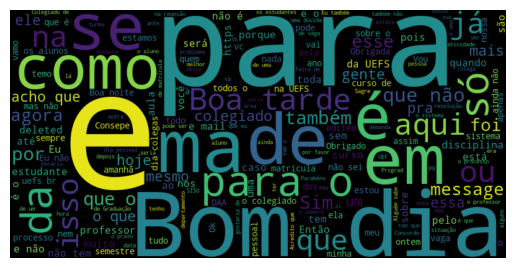

In [16]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Juntar todas as mensagens
all_messages = ' '.join(df['content'])
words = all_messages.split()
word_freq = Counter(words).most_common(30)

# Nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate(all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
import spacy
nlp = spacy.load("pt_core_news_sm")


In [19]:
def remove_stopwords_spacy(text):
    doc = nlp(str(text))  # Processa o texto
    # Filtra tokens que não são stop words e mantém apenas palavras (exclui pontuação)
    tokens_sem_stop = [token.text for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens_sem_stop)

In [22]:
df['content_sem_stopwords'] = df['content'].apply(remove_stopwords_spacy)


In [23]:
df.head(10)

,date,time,author,content,is_question,content_sem_stopwords
10408,01/01/23,11:19:09,Cláudia,Feliz 2023!!!!! Que tenhamos um novo recomeço ...,False,Feliz tenhamos recomeço saúde luz vidas realiz...
10409,01/01/23,17:21:59,~ Rosevaldo,https://gabinetedatransicao.com.br/noticias/di...,False,
10410,01/01/23,17:22:54,Ady,Essa imagem diz muito 👆🏻,False,imagem
10411,01/01/23,17:23:08,Ady,❤️,False,
10412,01/01/23,17:27:43,Adriana Queiroz - Agronomia,Eu nunca vi uma posse tão representativa,False,vi posse representativa
10413,01/01/23,17:27:53,Adriana Queiroz - Agronomia,Muito emocionante,False,emocionante
10414,01/01/23,17:34:29,Myria Felix,Amei,False,Amei
10415,01/01/23,17:34:54,Myria Felix,Estou emocionada também.,False,emocionada
10891,01/02/23,08:26:06,Carla Borges,"Bom dia, pessoal! Estou de volta e à disposiçã...",False,dia pessoal volta disposição Abraço
10892,01/02/23,08:26:53,Gleice Cordeiro,OBAAAA,False,OBAAAA


In [24]:
df['mensagem_formatada2'] = df['date'] + ' ' + df['time'] + ' ' + df['author'] + ": " + df['content_sem_stopwords']

# 2. Juntar todas as mensagens em um único texto
texto_completo = '\n'.join(df['mensagem_formatada2'])

# 3. Salvar em um arquivo .txt
with open('conversa_whatsapp_stop_wrods.txt', 'w', encoding='utf-8') as arquivo:
    arquivo.write(texto_completo)

print("Arquivo gerado com sucesso!")

Arquivo gerado com sucesso!


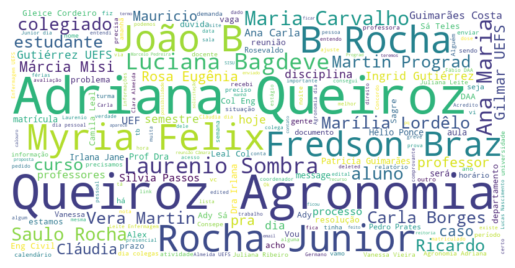

In [25]:
# Juntar todas as mensagens
all_messages = ' '.join(df['mensagem_formatada2'])
words = all_messages.split()
word_freq = Counter(words).most_common(30)

# Nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

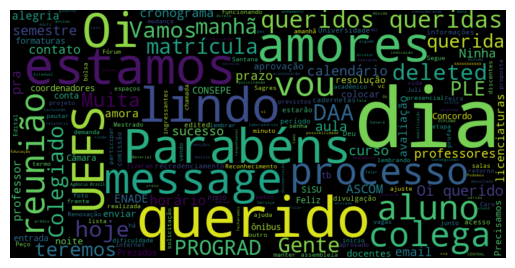

In [26]:
rosa = df[df['author']=="🌹 Rosa Eugênia 🌹"]
all_messages = ' '.join(rosa['content_sem_stopwords'])
words = all_messages.split()
word_freq = Counter(words).most_common(30)

# Nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate(all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
df.to_pickle('df_analises_full.pkl')

In [43]:

for p in perguntas:
    start = time.time()
    resposta = chain.run(contexto=texto_completo, pergunta=p)
    end = time.time()
    print(f"Pergunta: {p}")
    print("Resposta:", resposta)
    print(f"Tempo: {end - start:.2f} segundos")
    print("-" * 50)  # Separador para melhor visualização

    # Adiciona os resultados ao DataFrame
    q = pd.DataFrame({
        'pergunta': [p],
        'resposta': [resposta],
        'texto': [3],
        'tempo': [end - start]
    })

    df_questions = pd.concat([df_questions, q], ignore_index=True)

    time.sleep(60)
    


Pergunta: Quais falhas do Sagres foram discutidas do texto?
Resposta: As seguintes falhas do Sagres foram mencionadas no texto:

*   **Problemas de acesso:** Usuários, incluindo professores e alunos, relataram dificuldades para acessar o sistema.
*   **Lentidão:** O sistema foi descrito como lento em vários momentos.
*   **Erros de lançamento de notas:** Professores tiveram problemas para lançar notas.
*   **Informações desatualizadas:** Dados como horários e cadastro de alunos não estavam atualizados.
*   **Dificuldade em gerar relatórios:** Problemas em gerar relatórios específicos, como os de aprovação/reprovação por disciplina ou lista de alunos matriculados.
*   **Problemas com a funcionalidade do SISVAC:** Dificuldades em verificar e homologar informações de vacinação.
*   **Problemas com dados de alunos:** Erros na importação de dados de alunos, levando a informações incorretas sobre matrícula e outras situações.
*   **Problemas com links:** Links quebrados ou redirecionando par

In [44]:
df_questions.to_pickle('respostas_perguntas3.pkl')

In [45]:
df_questions.to_csv('questions_full.csv', sep=';', index=False)

In [4]:
df_questions = pd.read_csv('questions_full.csv', sep=';')

In [5]:
df_questions

,pergunta,resposta,texto,tempo,parte
0,Quais falhas do Sagres foram discutidas do texto?,As falhas do Sagres discutidas no texto são:\n...,1,45.924979,NaN
1,Quais resoluções foram discutidas no Texto?,As seguintes resoluções foram discutidas no te...,1,39.131925,NaN
2,Listar dicas de uso do Sagres,## Dicas de Uso do SAGRES (UEFS) para Coordena...,1,47.458513,NaN
3,Quais as palavras mais mencionadas por Rosa?,"Analisando o contexto das mensagens, as palavr...",1,38.589759,NaN
4,Quantas Resoluções CONSEPE foram citadas?,1. 2022 - Resolução CONSEPE 01/2022\n2. 2 - Re...,1,39.068594,NaN
5,Quais professores mais participaram das conver...,"Com base nos dados fornecidos, os professores ...",1,41.645487,NaN
6,Quais falhas do Sagres foram discutidas do texto?,"Para responder a essa pergunta, preciso ter ac...",2,3.469409,0.0
7,Quais resoluções foram discutidas no Texto?,O texto fornecido é apenas um contexto. Ele de...,2,0.895169,0.0
8,Listar dicas de uso do Sagres,Para fornecer dicas de uso do Sagres (Sistema ...,2,6.424829,0.0
9,Quais as palavras mais mencionadas por Rosa?,"Para responder a essa pergunta, eu precisaria ...",2,0.941106,0.0


In [6]:
df_final = pd.read_pickle("respostas_perguntas3.pkl")
df_final

,pergunta,resposta,texto,tempo,parte
0,Quais falhas do Sagres foram discutidas do texto?,As falhas do Sagres discutidas no texto são:\n...,1,45.924979,NaN
1,Quais resoluções foram discutidas no Texto?,As seguintes resoluções foram discutidas no te...,1,39.131925,NaN
2,Listar dicas de uso do Sagres,## Dicas de Uso do SAGRES (UEFS) para Coordena...,1,47.458513,NaN
3,Quais as palavras mais mencionadas por Rosa?,"Analisando o contexto das mensagens, as palavr...",1,38.589759,NaN
4,Quantas Resoluções CONSEPE foram citadas?,1. 2022 - Resolução CONSEPE 01/2022\n2. 2 - Re...,1,39.068594,NaN
5,Quais professores mais participaram das conver...,"Com base nos dados fornecidos, os professores ...",1,41.645487,NaN
6,Quais falhas do Sagres foram discutidas do texto?,"Para responder a essa pergunta, preciso ter ac...",2,3.469409,0.0
7,Quais resoluções foram discutidas no Texto?,O texto fornecido é apenas um contexto. Ele de...,2,0.895169,0.0
8,Listar dicas de uso do Sagres,Para fornecer dicas de uso do Sagres (Sistema ...,2,6.424829,0.0
9,Quais as palavras mais mencionadas por Rosa?,"Para responder a essa pergunta, eu precisaria ...",2,0.941106,0.0


In [7]:
df_final[df_final['texto']==2]

,pergunta,resposta,texto,tempo,parte
6,Quais falhas do Sagres foram discutidas do texto?,"Para responder a essa pergunta, preciso ter ac...",2,3.469409,0.0
7,Quais resoluções foram discutidas no Texto?,O texto fornecido é apenas um contexto. Ele de...,2,0.895169,0.0
8,Listar dicas de uso do Sagres,Para fornecer dicas de uso do Sagres (Sistema ...,2,6.424829,0.0
9,Quais as palavras mais mencionadas por Rosa?,"Para responder a essa pergunta, eu precisaria ...",2,0.941106,0.0
10,Quantas Resoluções CONSEPE foram citadas?,"Sem o trecho do chat, é impossível determinar ...",2,0.731897,0.0
11,Quais professores mais participaram das conver...,"Para responder a essa pergunta, eu precisaria ...",2,1.837917,0.0
12,Quais falhas do Sagres foram discutidas do texto?,As falhas do Sagres discutidas no texto inclue...,2,1.300196,1.0
13,Quais resoluções foram discutidas no Texto?,O texto menciona discussões sobre **resoluções...,2,0.797121,1.0
14,Listar dicas de uso do Sagres,"Considerando o contexto fornecido, as dicas de...",2,4.882309,1.0
15,Quais as palavras mais mencionadas por Rosa?,"Para responder a essa pergunta, eu precisaria ...",2,1.523878,1.0


## AValiação

In [8]:
df_resut = pd.DataFrame()

In [9]:
df_resut = df_final[df_final.index.isin([0,1,2,3,4,5, 18,19,20,21,22,23,24,25,26,27,28,29])]
df_resut

,pergunta,resposta,texto,tempo,parte
0,Quais falhas do Sagres foram discutidas do texto?,As falhas do Sagres discutidas no texto são:\n...,1,45.924979,NaN
1,Quais resoluções foram discutidas no Texto?,As seguintes resoluções foram discutidas no te...,1,39.131925,NaN
2,Listar dicas de uso do Sagres,## Dicas de Uso do SAGRES (UEFS) para Coordena...,1,47.458513,NaN
3,Quais as palavras mais mencionadas por Rosa?,"Analisando o contexto das mensagens, as palavr...",1,38.589759,NaN
4,Quantas Resoluções CONSEPE foram citadas?,1. 2022 - Resolução CONSEPE 01/2022\n2. 2 - Re...,1,39.068594,NaN
5,Quais professores mais participaram das conver...,"Com base nos dados fornecidos, os professores ...",1,41.645487,NaN
18,Quais falhas do Sagres foram discutidas do texto?,"Com base no texto fornecido, as falhas do SAGR...",2,1.509957,2.0
19,Quais resoluções foram discutidas no Texto?,O texto fornecido não detalha resoluções espec...,2,3.243320,2.0
20,Listar dicas de uso do Sagres,"Considerando o contexto fornecido, as dicas de...",2,9.061855,2.0
21,Quais as palavras mais mencionadas por Rosa?,O contexto fornecido não menciona nenhuma pess...,2,1.118651,2.0


In [10]:
df_resut.to_csv('result_def.csv',encoding='utf-8', index=False)

In [17]:
autor = Counter(df['author']).most_common(10)
autor

[('Adriana Queiroz - Agronomia', 2766),
 ('João B. Rocha-Junior', 1504),
 ('Myria Felix', 1472),
 ('Fredson Braz', 1350),
 ('Luciana Bagdeve', 1255),
 ('Laurenio Sombra', 1175),
 ('Ana Maria Carvalho', 1156),
 ('Ricardo', 966),
 ('Saulo Rocha', 916),
 ('Vera Martin (Prograd)', 807)]

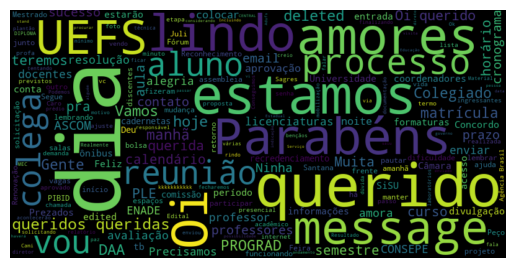

In [59]:
rosa = df[df['author']=="🌹 Rosa Eugênia 🌹"]
all_messages = ' '.join(rosa['content_sem_stopwords'])
words = all_messages.split()
word_freq = Counter(words).most_common(50)

# Nuvem de palavras
wordcloud = WordCloud(width=800, height=400).generate(all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
'ok' in words

False

In [32]:
df_resumo[df_resumo['texto']==3]['resposta'].to_csv('3.txt')

In [53]:
df.head()

,date,time,author,content,is_question,content_sem_stopwords,mensagem_formatada2
10408,2023-01-01,2025-06-19 11:19:09,Cláudia,Feliz 2023!!!!! Que tenhamos um novo recomeço ...,False,Feliz tenhamos recomeço saúde luz vidas realiz...,01/01/23 11:19:09 Cláudia: Feliz tenhamos reco...
10409,2023-01-01,2025-06-19 17:21:59,~ Rosevaldo,https://gabinetedatransicao.com.br/noticias/di...,False,,01/01/23 17:21:59 ~ Rosevaldo:
10410,2023-01-01,2025-06-19 17:22:54,Ady,Essa imagem diz muito 👆🏻,False,imagem,01/01/23 17:22:54 Ady: imagem
10411,2023-01-01,2025-06-19 17:23:08,Ady,❤️,False,,01/01/23 17:23:08 Ady:
10412,2023-01-01,2025-06-19 17:27:43,Adriana Queiroz - Agronomia,Eu nunca vi uma posse tão representativa,False,vi posse representativa,01/01/23 17:27:43 Adriana Queiroz - Agronomia:...


In [65]:
df.author.nunique()

78

In [117]:
import re

texto = ' '.join(df['content'])

#padrao = r"(?i)(resolu[cç][aã]o\s*)"
resolucoes = re.findall(padrao, texto)
print(len(resolucoes))

42


In [116]:
#padrao = r"(?i)(resolu[cç][ãa]o\s+(?:consepe\s*)?n?[º°]?\s*\d{1,3}\s*/\s*\d{4})"
padrao = r"resoluç(?:ão|ões).*?(?:n[º°o]?\s*)?(\d{1,4})\/(\d{4}).*?consepe"

In [123]:
resolucoes

[('04', '4298'),
 ('06', '5186'),
 ('54', '2001'),
 ('086', '2009'),
 ('8060', '8061'),
 ('356', '2009'),
 ('46', '2006'),
 ('126', '2021'),
 ('10', '5442'),
 ('129', '2019'),
 ('039', '2011'),
 ('126', '2021'),
 ('02', '2025'),
 ('04', '2025'),
 ('11', '2024'),
 ('103', '2012'),
 ('11', '5495'),
 ('030', '2002'),
 ('04', '2024'),
 ('09', '2022'),
 ('05', '2024'),
 ('069', '2023'),
 ('01', '2024'),
 ('084', '2009'),
 ('11', '2022'),
 ('07', '2024'),
 ('09', '2022'),
 ('788', '2008'),
 ('2', '2019'),
 ('046', '2006'),
 ('09', '2024'),
 ('046', '2006'),
 ('54', '2001'),
 ('05', '4419'),
 ('01', '2025'),
 ('03', '2024'),
 ('05', '5159'),
 ('126', '2021'),
 ('039', '2011'),
 ('001', '2017'),
 ('007', '2019'),
 ('172', '2010')]

In [129]:
contador = Counter(resolucoes)
print("Resoluções únicas encontradas:")
for resolucao, count in contador.items():
    if resolucao[0] == '054':
        print(f"- {resolucao}: {count}x")

Resoluções únicas encontradas:


In [145]:
df_resut['id_pergunta'] = df_resut['pergunta'].astype('category').cat.codes
df_resut['id_pergunta'] = pd.factorize(df_resut['pergunta'])[0] + 1

df_resut


,pergunta,resposta,texto,tempo,parte,id_pergunta
0,Quais falhas do Sagres foram discutidas do texto?,As falhas do Sagres discutidas no texto são:\n...,1,45.924979,NaN,1
1,Quais resoluções foram discutidas no Texto?,As seguintes resoluções foram discutidas no te...,1,39.131925,NaN,2
2,Listar dicas de uso do Sagres,## Dicas de Uso do SAGRES (UEFS) para Coordena...,1,47.458513,NaN,3
3,Quais as palavras mais mencionadas por Rosa?,"Analisando o contexto das mensagens, as palavr...",1,38.589759,NaN,4
4,Quantas Resoluções CONSEPE foram citadas?,1. 2022 - Resolução CONSEPE 01/2022\n2. 2 - Re...,1,39.068594,NaN,5
5,Quais professores mais participaram das conver...,"Com base nos dados fornecidos, os professores ...",1,41.645487,NaN,6
18,Quais falhas do Sagres foram discutidas do texto?,"Com base no texto fornecido, as falhas do SAGR...",2,1.509957,2.0,1
19,Quais resoluções foram discutidas no Texto?,O texto fornecido não detalha resoluções espec...,2,3.243320,2.0,2
20,Listar dicas de uso do Sagres,"Considerando o contexto fornecido, as dicas de...",2,9.061855,2.0,3
21,Quais as palavras mais mencionadas por Rosa?,O contexto fornecido não menciona nenhuma pess...,2,1.118651,2.0,4


In [146]:
df_resut['texto'] = df_resut['texto'].astype(str)

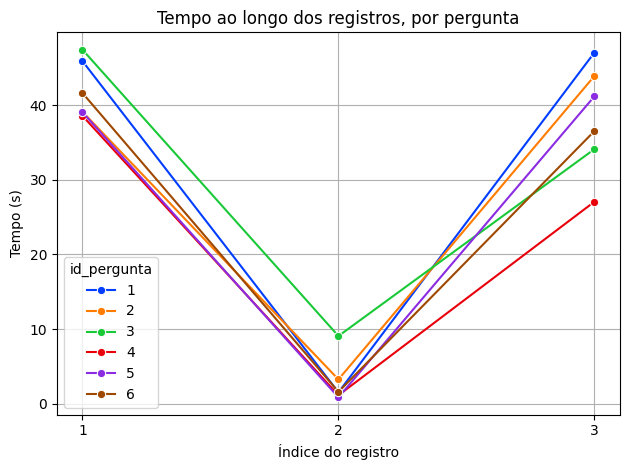

In [ ]:
import seaborn as sns
sns.lineplot(
    data=df_resut,
    x='texto',     # posição no texto
    y='tempo',
    hue='id_pergunta',  # uma linha por pergunta
    marker='o',
    palette='bright'
)

plt.title('Tempo de resposta ao longo dos contexto, por pergunta')
plt.xlabel('Índice dos contexto')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='id_pergunta')
plt.tight_layout()
plt.show()